# Задание
* Скачать все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, а также captcha подумайте как их можно обойти)
* Извлеките все описания этих вакансий
* Создайте аналогичный vacancy DataFrame только добавьте поле skills
* Переведите даты публикаций в datetime
* Постройте график опубликованных вакансий по датам
* Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
* Найдите те вакансии с использованием python, которые вам интересны
* Определите по полю skills какие навыки больше всего востребованы для этих вакансий
* Постройте график наиболее востребованных навыков для аналитика данных

In [7]:
import requests
import json
#from tqdm.auto import tqdm
from tqdm import *
#import tqdm
from collections import defaultdict
import pickle
import pandas as pd

In [8]:
sber = '3529'
page = 1
num_per_page = 100
moscow = 1
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}&area={moscow}'

In [9]:
res = requests.get(url)

In [10]:
res.json()

{'alternate_url': 'https://hh.ru/search/vacancy?area=1&control_flag=vacancyBlacklistJoinEnabled%3ATrue&employer_id=3529&enable_snippets=true&items_on_page=100&page=1',
 'arguments': None,
 'clusters': None,
 'found': 1247,
 'items': [{'accept_temporary': False,
   'address': {'building': '32к1',
    'city': 'Москва',
    'description': None,
    'id': '731097',
    'lat': 55.741338,
    'lng': 37.531127,
    'metro': {'lat': 55.740544,
     'line_id': '4',
     'line_name': 'Филевская',
     'lng': 37.5341,
     'station_id': '4.73',
     'station_name': 'Кутузовская'},
    'metro_stations': [{'lat': 55.740544,
      'line_id': '4',
      'line_name': 'Филевская',
      'lng': 37.5341,
      'station_id': '4.73',
      'station_name': 'Кутузовская'},
     {'lat': 55.740833,
      'line_id': '95',
      'line_name': 'МЦК',
      'lng': 37.533333,
      'station_id': '95.536',
      'station_name': 'Кутузовская'}],
    'raw': 'Москва, Кутузовский проспект, 32к1',
    'street': 'Кутузовск

In [11]:

vacancies = res.json()
num_pages = vacancies.get('pages')
num_pages

13

In [13]:
v = vacancies.get('items')

In [14]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [15]:
vacancies = res.json()
num_pages = vacancies.get('pages')
vacancy_ids = [el.get('id') for el in vacancies.get('items')]

In [16]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [17]:
vnum  = vacancies.get('pages')

In [27]:
all_vacancy_ids= []
for i in tqdm(range(vnum)):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}&area={moscow}'
    res = requests.get(url)
    vacancies = res.json()
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:06<00:00,  2.03it/s]


In [28]:
len(all_vacancy_ids)

1249

In [53]:
from collections import defaultdict
tab_dict2 = defaultdict(list)

In [54]:
#Создайте аналогичный vacancy DataFrame только добавьте поле skills
for vac_id in tqdm(all_vacancy_ids):
    url = f'https://api.hh.ru/vacancies/{vac_id}'
    res = requests.get(url)
    vacancy = res.json()
    tab_dict2['id'].append(vacancy.get('id'))
    tab_dict2['name'].append(vacancy.get('name'))
    tab_dict2['published_at'].append(vacancy.get('published_at'))
    tab_dict2['description'].append(vacancy.get('description'))
    skills = ','.join([x.get('name') for x in vacancy.get('key_skills')])
    tab_dict2['key_skills'].append(skills)

100%|██████████████████████████████████████████████████████████████████████████████| 1249/1249 [04:47<00:00,  4.78it/s]


In [55]:
df_dictionary = pd.DataFrame(tab_dict2)

In [59]:
#Извлеките все описания этих вакансий
df_dictionary.description.head(10)

0    <p>Клиентский менеджер малого и микробизнеса –...
1    <p>Сбер — лучший работодатель России. У нас бо...
2    <p>Сбер — лучший работодатель России. У нас бо...
3    <p>Сбер — лучший работодатель России. У нас бо...
4    <p>Сбер — лучший работодатель России. У нас бо...
5    <p>Команда Цифровые поверхности Салют (SberDev...
6    <p>Основная задача — ведение партнёрского трек...
7    <p>Мы ищем администратора проекта в команду Сб...
8    <p>SberDevices - новое направление компании, к...
9    <p><strong>Обязанности</strong></p> <ul> <li>о...
Name: description, dtype: object

In [61]:
#Создайте аналогичный vacancy DataFrame только добавьте поле skills
df_dictionary2 = df_dictionary.copy()
df_dictionary2.head(5)

,description,id,key_skills,name,published_at
0,<p>Клиентский менеджер малого и микробизнеса –...,53361761,"Активные продажи,Проведение презентаций,Привле...",Клиентский менеджер малого и микробизнеса,2022-06-27T12:47:08+0300
1,<p>Сбер — лучший работодатель России. У нас бо...,55415805,,Менеджер по работе с клиентами,2022-07-06T13:45:50+0300
2,<p>Сбер — лучший работодатель России. У нас бо...,55415496,,Клиентский менеджер прямых продаж,2022-06-29T19:44:36+0300
3,<p>Сбер — лучший работодатель России. У нас бо...,45790891,"Прямые продажи,Финансовый анализ,Клиентоориент...",Менеджер по работе с ключевыми клиентами малог...,2022-06-30T09:20:16+0300
4,<p>Сбер — лучший работодатель России. У нас бо...,45381514,"Холодные продажи,Поиск и привлечение клиентов,...",Старший менеджер по привлечению корпоративных ...,2022-06-30T09:20:12+0300


In [62]:
df_dictionary2.columns

Index(['description', 'id', 'key_skills', 'name', 'published_at'], dtype='object')

In [64]:
df_dictionary2["skills"] = df_dictionary2['key_skills']
df_dictionary2.columns

Index(['description', 'id', 'key_skills', 'name', 'published_at', 'skills'], dtype='object')

In [65]:
#Переведите даты публикаций в datetime
df_dictionary.published_at = pd.to_datetime(df_dictionary.published_at)
df_dictionary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 5 columns):
description     1249 non-null object
id              1249 non-null object
key_skills      1249 non-null object
name            1249 non-null object
published_at    1249 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 48.9+ KB


In [66]:
#Постройте график опубликованных вакансий по датам
import matplotlib.pyplot as plt

In [68]:
df_dictionary.head(2)

,description,id,key_skills,name,published_at
0,<p>Клиентский менеджер малого и микробизнеса –...,53361761,"Активные продажи,Проведение презентаций,Привле...",Клиентский менеджер малого и микробизнеса,2022-06-27 09:47:08
1,<p>Сбер — лучший работодатель России. У нас бо...,55415805,,Менеджер по работе с клиентами,2022-07-06 10:45:50


In [69]:
df_dictionary['vacdate'] = df_dictionary['published_at']
df_dictionary.head(3)

,description,id,key_skills,name,published_at,vacdate
0,<p>Клиентский менеджер малого и микробизнеса –...,53361761,"Активные продажи,Проведение презентаций,Привле...",Клиентский менеджер малого и микробизнеса,2022-06-27 09:47:08,2022-06-27 09:47:08
1,<p>Сбер — лучший работодатель России. У нас бо...,55415805,,Менеджер по работе с клиентами,2022-07-06 10:45:50,2022-07-06 10:45:50
2,<p>Сбер — лучший работодатель России. У нас бо...,55415496,,Клиентский менеджер прямых продаж,2022-06-29 16:44:36,2022-06-29 16:44:36


In [70]:
df_dictionary['vacdate'] = pd.to_datetime(df_dictionary['vacdate']).dt.date
df_dictionary.head(3)

,description,id,key_skills,name,published_at,vacdate
0,<p>Клиентский менеджер малого и микробизнеса –...,53361761,"Активные продажи,Проведение презентаций,Привле...",Клиентский менеджер малого и микробизнеса,2022-06-27 09:47:08,2022-06-27
1,<p>Сбер — лучший работодатель России. У нас бо...,55415805,,Менеджер по работе с клиентами,2022-07-06 10:45:50,2022-07-06
2,<p>Сбер — лучший работодатель России. У нас бо...,55415496,,Клиентский менеджер прямых продаж,2022-06-29 16:44:36,2022-06-29


In [71]:
vacs_statistics = df_dictionary.groupby('vacdate')['id'].count().sort_values(ascending=False)
vacs_statistics.head(5)

vacdate
2022-07-05    92
2022-07-04    88
2022-07-11    86
2022-07-12    79
2022-06-27    77
Name: id, dtype: int64

In [72]:
from pylab import rcParams

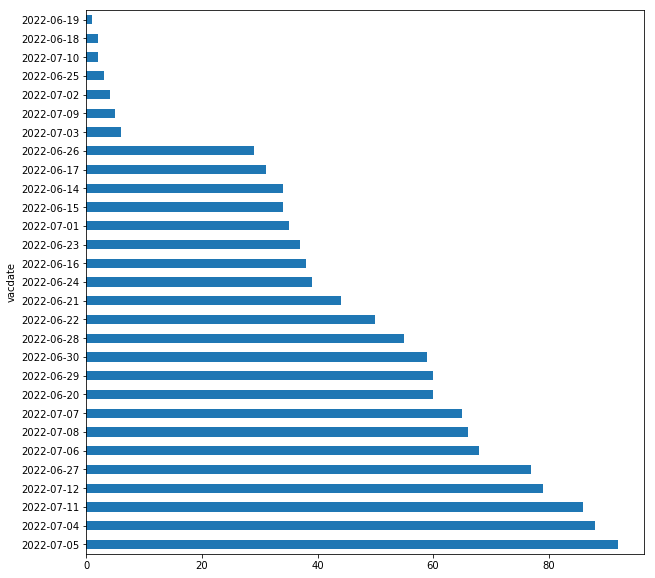

In [74]:
rcParams['figure.figsize'] = 10,10
vacs_statistics.plot(kind='barh')
plt.show()

In [ ]:
#Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий

In [75]:
df_dictionary['weekday_num'] = df_dictionary['published_at']
df_dictionary.weekday_num = pd.to_datetime(df_dictionary.weekday_num)
df_dictionary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 7 columns):
description     1249 non-null object
id              1249 non-null object
key_skills      1249 non-null object
name            1249 non-null object
published_at    1249 non-null datetime64[ns]
vacdate         1249 non-null object
weekday_num     1249 non-null datetime64[ns]
dtypes: datetime64[ns](2), object(5)
memory usage: 68.4+ KB


In [89]:
df_dictionary.head(3)

,description,id,key_skills,name,published_at,vacdate,weekday_num
0,<p>Клиентский менеджер малого и микробизнеса –...,53361761,"Активные продажи,Проведение презентаций,Привле...",Клиентский менеджер малого и микробизнеса,2022-06-27 09:47:08,2022-06-27,2022-06-27 09:47:08
1,<p>Сбер — лучший работодатель России. У нас бо...,55415805,,Менеджер по работе с клиентами,2022-07-06 10:45:50,2022-07-06,2022-07-06 10:45:50
2,<p>Сбер — лучший работодатель России. У нас бо...,55415496,,Клиентский менеджер прямых продаж,2022-06-29 16:44:36,2022-06-29,2022-06-29 16:44:36


In [93]:
df_dictionary['weekday_num'] = df_dictionary['weekday_num'].dt.strftime("%A")

In [94]:
df_dictionary.groupby('weekday_num')['id'].count().sort_values(ascending=False).reset_index()

,weekday_num,id
0,Monday,311
1,Tuesday,304
2,Wednesday,212
3,Thursday,199
4,Friday,171
5,Sunday,38
6,Saturday,14


In [ ]:
#Найдите те вакансии с использованием python, которые вам интересны

In [96]:
df_copy = df_dictionary.copy()

In [97]:
df_copy.head(3)

,description,id,key_skills,name,published_at,vacdate,weekday_num
0,<p>Клиентский менеджер малого и микробизнеса –...,53361761,"Активные продажи,Проведение презентаций,Привле...",Клиентский менеджер малого и микробизнеса,2022-06-27 09:47:08,2022-06-27,Monday
1,<p>Сбер — лучший работодатель России. У нас бо...,55415805,,Менеджер по работе с клиентами,2022-07-06 10:45:50,2022-07-06,Wednesday
2,<p>Сбер — лучший работодатель России. У нас бо...,55415496,,Клиентский менеджер прямых продаж,2022-06-29 16:44:36,2022-06-29,Wednesday


In [112]:
vac_love = df_copy.name.str.lower().str.contains('python')

In [113]:
love = df_copy[vac_love].count()
love.id

38

In [ ]:
#Определите по полю skills какие навыки больше всего востребованы для этих вакансий

In [114]:
df_copy.head(3)

,description,id,key_skills,name,published_at,vacdate,weekday_num
0,<p>Клиентский менеджер малого и микробизнеса –...,53361761,"Активные продажи,Проведение презентаций,Привле...",Клиентский менеджер малого и микробизнеса,2022-06-27 09:47:08,2022-06-27,Monday
1,<p>Сбер — лучший работодатель России. У нас бо...,55415805,,Менеджер по работе с клиентами,2022-07-06 10:45:50,2022-07-06,Wednesday
2,<p>Сбер — лучший работодатель России. У нас бо...,55415496,,Клиентский менеджер прямых продаж,2022-06-29 16:44:36,2022-06-29,Wednesday


In [117]:
skills_most_common = df_copy[vac_love].groupby('key_skills')['id'].count().sort_values(ascending=False).head(20)

In [119]:
skills_most_common.head(3)

key_skills
                                                                                                                                                                                                                                                                 13
Python,Тест-дизайн,Функциональное тестирование,Регресcионное тестирование,Автоматизированное тестирование,Atlassian Jira,Pytest,Test case,Регресионное тестирование,PostgreSQL,Интеграционное тестирование,Тестирование пользовательского интерфейса,Selenium     1
DevOps,PostgreSQL,Jenkins,BitBucket,Nexus,OpenShift,Docker                                                                                                                                                                                                        1
Name: id, dtype: int64

In [ ]:
#Постройте график наиболее востребованных навыков для аналитика данных

In [143]:
df_copy.head(3)

,description,id,key_skills,name,published_at,vacdate,weekday_num
0,<p>Клиентский менеджер малого и микробизнеса –...,53361761,"Активные продажи,Проведение презентаций,Привле...",Клиентский менеджер малого и микробизнеса,2022-06-27 09:47:08,2022-06-27,Monday
1,<p>Сбер — лучший работодатель России. У нас бо...,55415805,,Менеджер по работе с клиентами,2022-07-06 10:45:50,2022-07-06,Wednesday
2,<p>Сбер — лучший работодатель России. У нас бо...,55415496,,Клиентский менеджер прямых продаж,2022-06-29 16:44:36,2022-06-29,Wednesday


In [163]:
vac_find = df_dictionary.name.str.lower().str.contains('аналитик данных')

In [164]:
f_love = df_copy[vac_find]

In [165]:
f_love

,description,id,key_skills,name,published_at,vacdate,weekday_num
72,"<p>В команду, занимающуюся продажей продуктов ...",67346866,,Аналитик данных (campaign analyst),2022-06-29 13:05:30,2022-06-29,Wednesday
167,<p><strong><em>Мы создаем централизованное под...,67073420,,Аналитик данных/ Разработчик отчетности,2022-06-22 07:41:27,2022-06-22,Wednesday
558,<p><strong>Обязанности</strong></p> <ul> <li>М...,67654420,,Аналитик данных Управление рыночных рисков,2022-07-11 09:48:39,2022-07-11,Monday
765,<p><strong>Обязанности</strong></p> <p>• Расши...,67061564,,Аналитик данных под ЕСС (единый семантический ...,2022-06-21 20:48:56,2022-06-21,Tuesday


In [ ]:
#С аналитиком данных всего 4 вакансии, без описания, график не построить.